In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.backends.backend_pdf import PdfPages

In [18]:
c_AB = (0.7686, 0.4196, 0.1882, 1)   #set color for AB points
e_AB = (0.7686, 0.4196, 0.1882, 0.5) #set color for AB errors
c_G5 = (0.3725, 0.5804, 0.4588, 1)   #set color for AB+10074-G5 points
e_G5 = (0.3725, 0.5804, 0.4588, 0.5) #set color for AB+10074-G5 errors
blue_dark  = (0.4392, 0.5961, 0.8196) #set dark blue
blue_light = (0.6549, 0.7765, 0.8941) #set light blue
red_dark   = (0.4431, 0.1059, 0.0941) #set dark red
red_light  = (0.6392, 0.4118, 0.3882) #set light red


In [ ]:
def weighted_avg_and_std(values):
    average = np.average(values)
    variance = np.average((values-average)**2)
    return (math.sqrt(variance))

### Abeta apo

In [19]:
###Adding in the files for the CS with the back-caluclated values from plumed driver (CS_apo_ad)
cs_g=pd.read_csv('/pool/work/adelie/gabis_data/apo_protein/CS_COLVAR_AB', delim_whitespace=True)
cs_a=pd.read_csv('/pool/work/adelie/results_control/input_data/CS_apo_ad', delim_whitespace=True)

In [20]:
df=pd.DataFrame(cs_g)
df1=pd.DataFrame(cs_a)

df_mean = df.mean()
df1_mean = df1.mean()

df_f=df_mean.iloc[1:43]
df1_f=df1_mean.iloc[1:43]

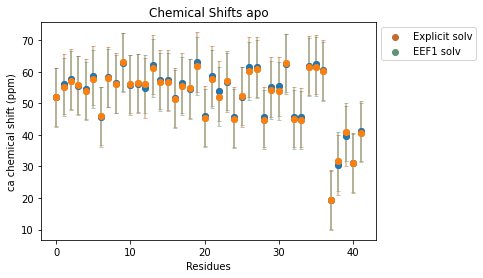

In [51]:
plt.scatter(y=df_f, x=range(42),color=c_AB,label="Explicit solv")
plt.errorbar(y=df_f, x=range(42), yerr=weighted_avg_and_std(df_f), fmt="o",ecolor=e_AB,capsize=2)
plt.scatter(y=df1_f, x=range(42),color=c_G5,label="EEF1 solv")
plt.errorbar(y=df1_f, x=range(42), yerr=weighted_avg_and_std(df1_f), fmt="o",ecolor=e_G5,capsize=2)
plt.legend(fontsize=10,bbox_to_anchor=(1.00,1), loc="upper left")
plt.title("Chemical Shifts apo")
plt.xlabel('Residues') 
plt.ylabel('ca chemical shift (ppm)') 
plt.show()

def save_multi_image(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig("/pool/work/adelie/results_control/chemshift/",pp, format='pdf')
    pp.close()

filename = "chem_shift_apo.pdf"
save_multi_image(filename)

### Abeta G5

In [52]:
cs_g=pd.read_csv('/pool/work/adelie/gabis_data/G5_protein/CS_COLVAR_G5', delim_whitespace=True)
cs_a=pd.read_csv('/pool/work/adelie/results_control/input_data/CS_G5_ad', delim_whitespace=True)

df=pd.DataFrame(cs_g)
df1=pd.DataFrame(cs_a)

df_mean = df.mean()
df1_mean = df1.mean()

df_f=df_mean.iloc[1:43]
df1_f=df1_mean.iloc[1:43]

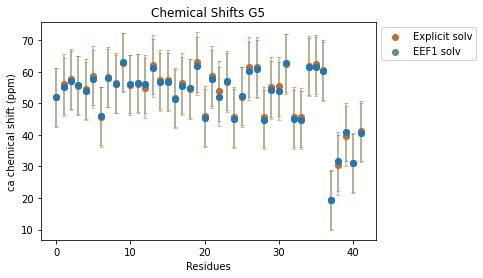

In [59]:
plt.scatter(y=df_f, x=range(42),color=c_AB,label="Explicit solv")
plt.errorbar(y=df_f, x=range(42), yerr=weighted_avg_and_std(df_f), fmt="o",color=e_AB,capsize=2)
plt.scatter(y=df1_f, x=range(42),color=c_G5,label="EEF1 solv")
plt.errorbar(y=df1_f, x=range(42), yerr=weighted_avg_and_std(df1_f), fmt="o",ecolor=e_G5,capsize=2)
plt.title("Chemical Shifts G5")
plt.legend(fontsize=10,bbox_to_anchor=(1.00,1), loc="upper left")
plt.xlabel('Residues') 
plt.ylabel('ca chemical shift (ppm)') 
plt.show()

def save_multi_image(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig("/pool/work/adelie/results_control/chemshift/",pp, format='pdf')
    pp.close()

filename = "chem_shift_G5.pdf"
save_multi_image(filename)